In [1]:
import importlib

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from Utils import paths
from Utils import transformation_utils as t_utils

importlib.reload(paths)
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [2]:
fhr = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/fhr.pickle")
uc = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/uc.pickle")
y = pd.read_pickle(f"{paths.CLEAN_DATA_PATH}/y.pickle")

fhr.shape, uc.shape, y.shape

((552, 21620), (552, 21620), (552,))

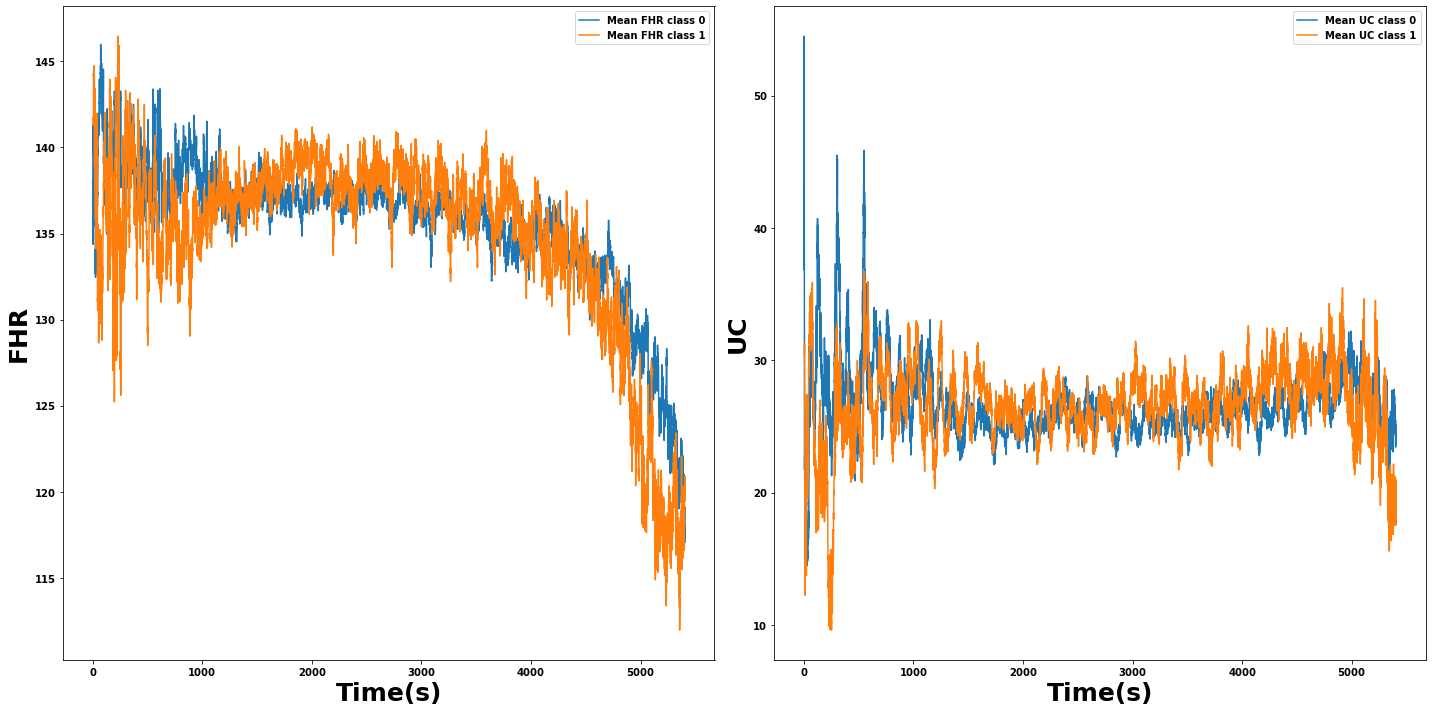

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax[0].plot(fhr[y == 0].mean().index, fhr[y == 0].mean().values, label='Mean FHR class 0')
ax[0].plot(fhr[y == 1].mean().index, fhr[y == 1].mean().values, label='Mean FHR class 1')
ax[1].plot(uc[y == 0].mean().index, uc[y == 0].mean().values, label='Mean UC class 0')
ax[1].plot(uc[y == 1].mean().index, uc[y == 1].mean().values, label='Mean UC class 1')

ax[0].set_xlabel('Time(s)', fontsize=25)
ax[1].set_xlabel('Time(s)', fontsize=25)
ax[0].set_ylabel('FHR', fontsize=25)
ax[1].set_ylabel('UC', fontsize=25)
ax[0].legend()
ax[1].legend()
fig.tight_layout()

In [4]:
cdcor_data = dict()
lags = t_utils.calc_lags(minutes=5)

for (idx_fhr, fhr_row), (idx_uc, uc_row) in tqdm(zip(fhr.copy().iterrows(), uc.copy().iterrows()), total=len(uc)):
    fhr_signal = pd.Series(fhr_row.values)
    uc_signal = pd.Series(uc_row.values)

    cdcor_data[idx_fhr] = joblib.Parallel(n_jobs=8)(
        joblib.delayed(t_utils.dcor)(fhr_signal, uc_signal.shift(lag), 3000)
        for lag in lags
    )
# 552/552 [2:59:49<00:00, 17.05s/it]
cdcor_df = pd.DataFrame(cdcor_data).T
cdcor_df.columns = lags
cdcor_df

  0%|          | 0/552 [00:00<?, ?it/s]

,-1199,-1198,-1197,-1196,-1195,-1194,-1193,-1192,-1191,-1190,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
1001,0.192948,0.192632,0.192154,0.191921,0.191809,0.191764,0.191722,0.191468,0.191558,0.191530,...,0.158082,0.158771,0.159855,0.160587,0.161317,0.161952,0.162629,0.163300,0.163993,0.164692
1002,0.100468,0.100972,0.101555,0.102130,0.102827,0.103549,0.104658,0.106062,0.107638,0.108457,...,0.139922,0.140125,0.140254,0.140413,0.140592,0.140582,0.140679,0.140510,0.139915,0.138960
1003,0.162816,0.162256,0.161569,0.160944,0.160239,0.159661,0.159059,0.158984,0.158743,0.158378,...,0.085547,0.085014,0.084481,0.083886,0.083346,0.082789,0.082171,0.081537,0.080665,0.079805
1004,0.113373,0.113774,0.114102,0.114211,0.114659,0.115114,0.115175,0.115475,0.115971,0.116520,...,0.179583,0.179500,0.179391,0.179345,0.179100,0.178829,0.178438,0.178080,0.177652,0.177054
1005,0.242651,0.242835,0.243133,0.243841,0.244312,0.244256,0.244066,0.244242,0.243950,0.244043,...,0.157983,0.157987,0.157851,0.157704,0.157901,0.158041,0.158127,0.157934,0.157745,0.157743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,0.131818,0.131582,0.131271,0.130819,0.130369,0.130064,0.129818,0.129748,0.129833,0.130096,...,0.237502,0.238429,0.239330,0.240515,0.241493,0.242233,0.243234,0.244157,0.245192,0.246006
2043,0.110304,0.110701,0.111004,0.110785,0.110925,0.111393,0.112049,0.112842,0.113590,0.114025,...,0.290978,0.290896,0.290442,0.289885,0.289018,0.288247,0.287252,0.286135,0.284944,0.283996
2044,0.146177,0.146335,0.146558,0.146824,0.146973,0.147125,0.147307,0.147527,0.147622,0.147567,...,0.224921,0.224977,0.224839,0.224642,0.224270,0.223962,0.223642,0.223450,0.223216,0.222841
2045,0.073986,0.073968,0.073926,0.073650,0.073883,0.073773,0.073980,0.074162,0.074389,0.074561,...,0.129845,0.129806,0.129638,0.129366,0.129123,0.128840,0.128408,0.127970,0.127320,0.126717


In [7]:
bad_idx = cdcor_df.index[cdcor_df.isna().sum(axis=1) != 0]
bad_idx

Int64Index([1104, 1119, 1134, 1149, 1155, 1158, 1186, 1188, 1258, 1292, 1322,
            1327, 1451, 1477, 1482, 2003],
           dtype='int64')

In [11]:
cdcor_df = cdcor_df.drop(bad_idx, errors='ignore')
y = y.drop(bad_idx, errors='ignore')

In [12]:
tt = np.array(lags)

cdcor_0 = cdcor_df.copy()[y == 0]
mean_0 = cdcor_0.mean().values
std_0 = cdcor_0.std().values
max_0 = cdcor_0.max().values
min_0 = cdcor_0.min().values

cdcor_1 = cdcor_df.copy()[y == 1]
mean_1 = cdcor_1.mean().values
std_1 = cdcor_1.std().values
max_1 = cdcor_1.max().values
min_1 = cdcor_1.min().values

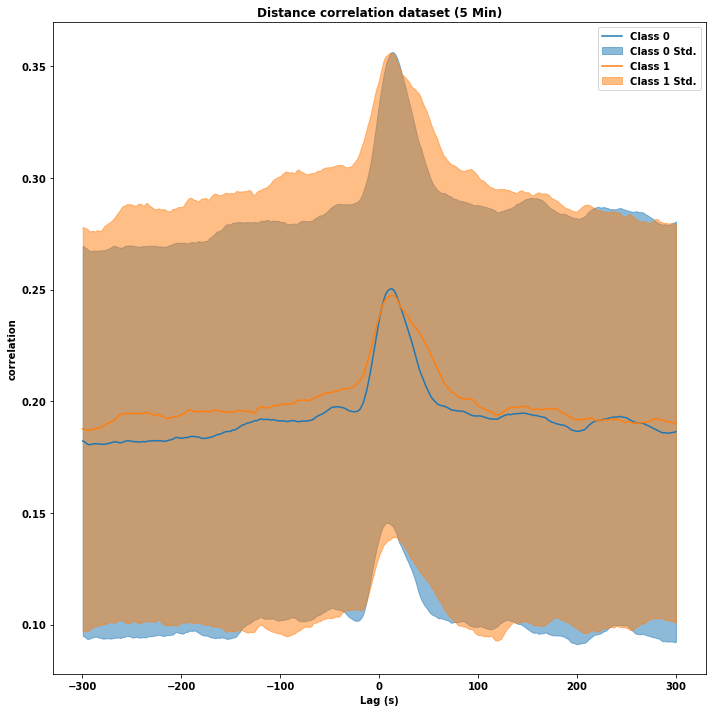

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])

ax.plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"Distance correlation dataset (5 Min)")
ax.set_ylabel(f"correlation")
ax.set_xlabel("Lag (s)")
fig.tight_layout()

plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Desc_plot.png")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Desc_plot.pdf")

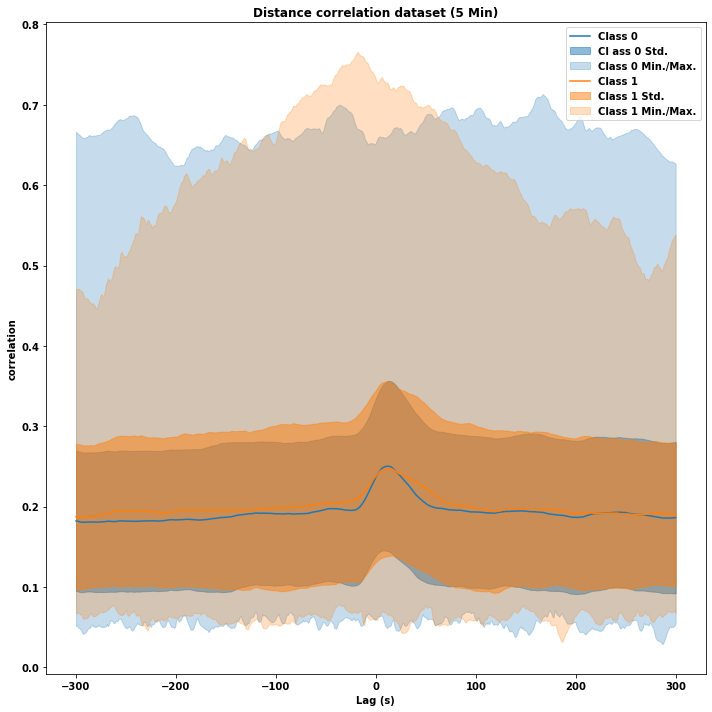

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax.fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Cl ass 0 Std.', alpha=0.5, color=COLORS[0])
ax.fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax.plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax.fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax.fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax.legend(loc='best')
ax.set_title(f"Distance correlation dataset (5 Min)")
ax.set_ylabel(f"correlation")
ax.set_xlabel("Lag (s)")
fig.tight_layout()

plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Desc_plot_Mm.png")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Desc_plot_Mm.pdf")

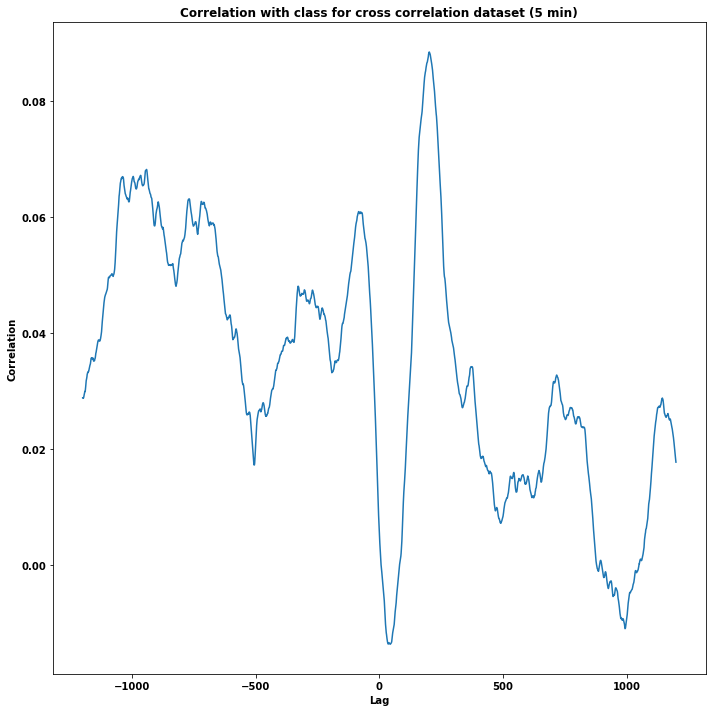

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

cdcor_df.corrwith(y).plot(ax=ax)

ax.set_ylabel('Correlation')
ax.set_xlabel('Lag')
ax.set_title(f'Correlation with class for cross correlation dataset (5 min)')
fig.tight_layout()

plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Class_correlation.png")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Class_correlation.pdf")

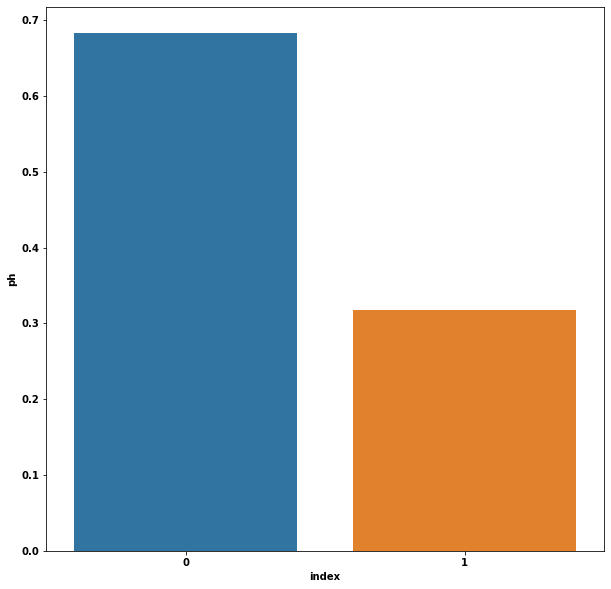

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x='class', y='%', data=pd.DataFrame(y.value_counts(normalize=True)).reset_index())
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Class_Distribution.png")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/Class_Distribution.pdf")

In [17]:
cdcor_df['patologico'] = y

In [18]:
cdcor_df.to_csv(f"{paths.CDCOR_DATA_PATH}/cc_dataset.csv")

In [19]:
X = cdcor_df.iloc[:, :-1]
X.to_pickle(f"{paths.CDCOR_DATA_PATH}/X.pickle")
y.to_pickle(f"{paths.CDCOR_DATA_PATH}/y.pickle")
